In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/CS589/H1/

%load_ext autoreload
%autoreload 2

Mounted at /content/drive
/content/drive/MyDrive/CS589/H1


In [ ]:
import numpy as np
import sklearn
import sklearn.model_selection
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def load():
  X = np.loadtxt("iris.csv",usecols=(0,1,2,3),delimiter=',')
  label=['Iris-setosa','Iris-versicolor','Iris-virginica']
  y=[]
  with open("iris.csv","r") as f:
    for line in f:
      spl = line.split(",")
      if len(spl) == 5:
        l = spl[4].strip()
        y.append(label.index(l))
          
  y = np.array(y)
  return X,y


In [ ]:
X,y = sklearn.utils.shuffle(load())

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.2)

In [ ]:
class KNN:
  def train(self, X, y):
    self.f_max = np.amax(X,axis=0)
    self.f_min = np.amin(X,axis=0)

    self.X_train = self.normalize(X)
    self.y_train = y

  def normalize(self,X):
    return (X - self.f_min) / (self.f_max - self.f_min)
  
  def perdict(self,X,k):

    X = self.normalize(X)
  
    dist = self.compute_dist(X)
    y_predict = np.ones(dist.shape[0])
    for i in range(dist.shape[0]):
      ind = np.argsort(dist[i])[:k]
      neighb_y = self.y_train[ind]
      neighb_count = Counter(neighb_y)
      y_predict[i] = neighb_count.most_common(1)[0][0]
    
    return y_predict

  def compute_dist(self,X):

    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dist = np.zeros((num_test,num_train))
    for i in range(num_test):
      dist[i] = np.sum((self.X_train - X[i]) ** 2,axis = 1)

    return dist
    # return np.sqrt(np.sum((self.X_train ** 2),axis=1) + np.sum((X ** 2),axis = 1)[...,None] - 2 * X.dot(self.X_train.T))


In [ ]:
knn_classifier = KNN()
knn_classifier.train(X_train,y_train)

In [ ]:
y_predict = knn_classifier.perdict(X_train,1)
train_acc = np.sum(y_predict == y_train) / y_train.shape[0]
train_acc

1.0

In [ ]:
y_predict = knn_classifier.perdict(X_test,5)
test_acc = np.sum(y_predict == y_test) / y_test.shape[0]
test_acc

0.9333333333333333

In [ ]:
k_vals = list(range(1,52,2))
test_acc = {}
train_acc = {}

X,y = load()

for k in k_vals:

  for i in range(20):
    X,y = sklearn.utils.shuffle(X,y)
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = 0.2)
    knn_classifier = KNN()
    knn_classifier.train(X_train,y_train)
    
    y_predict = knn_classifier.perdict(X_train,k)
    tr_acc = np.sum(y_predict == y_train) / y_train.shape[0]

    y_predict = knn_classifier.perdict(X_test,k)
    te_acc = np.sum(y_predict == y_test) / y_test.shape[0]

    if k not in test_acc:
      test_acc[k] = [te_acc]
    else:
      test_acc[k].append(te_acc)

    if k not in train_acc:
      train_acc[k] = [tr_acc]
    else:
      train_acc[k].append(tr_acc)

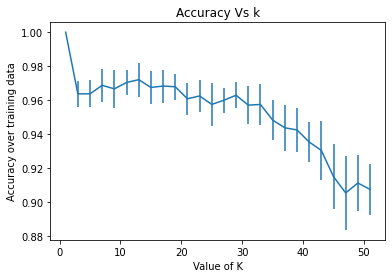

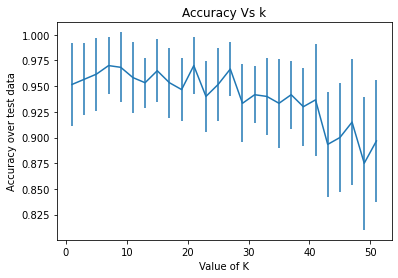

In [ ]:
test_mean=[]
test_std = []
train_mean = []
train_std = []

for k in k_vals:
  test_mean.append(np.mean(test_acc[k]))
  test_std.append(np.std(test_acc[k]))

  train_mean.append(np.mean(train_acc[k]))
  train_std.append(np.std(train_acc[k]))

plt.errorbar(k_vals,train_mean,train_std)
plt.xlabel("Value of K")
plt.ylabel("Accuracy over training data")
plt.title("Accuracy Vs k")
plt.show()

plt.errorbar(k_vals,test_mean,test_std)
plt.xlabel("Value of K")
plt.ylabel("Accuracy over test data")
plt.title("Accuracy Vs k")
plt.show()